In [1]:
import sys
sys.path.append("../../")
from taxcalc import *
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt 
from matplotlib.transforms import BlendedGenericTransform
%matplotlib inline

In [2]:
CBO_growth = {2013: {'_factor_target': [0.022, 
                                        0.024,
                                        0.024,
                                        0.025,
                                        0.026,
                                        0.023,
                                        0.018,
                                        0.019,
                                        0.021,
                                        0.021,
                                        0.021,
                                        0.02,
                                        0.02,
                                        0.02]
                     }
              }

In [3]:
# Current law baseline
policy_cl = Policy()
behavior_cl = Behavior()
records_cl = Records("../../specialpuf.csv")
calc_cl = Calculator(policy_cl, records_cl, behavior_cl)
calc_cl.growth.update_economic_growth(CBO_growth)
for i in range(4):
    calc_cl.increment_year()
assert calc_cl.current_year == 2017
calc_cl.calc_all()
print "Done"

You loaded data for 2009.
Your data have been extrapolated to 2013.
Done


In [4]:
policy_all = Policy()
behavior_all = Behavior()
records_all = Records("../../specialpuf.csv")
reform_all = {
    2017: {
        '_II_rt1': [0.12],
        '_II_rt2': [0.12],
        '_II_rt3': [0.25],
        '_II_rt4': [0.25],
        '_II_rt5': [0.33],
        '_II_rt6': [0.33],
        '_II_rt7': [0.33],
        '_AMT_trt1': [0.0],
        '_AMT_trt2': [0.0],
        '_STD': [[12000, 24000, 12000, 18000, 24000, 12000, 1050]],
        '_STD_Aged': [[0,0,0,0,0,0],
                      [0,0,0,0,0,0],
                      [0,0,0,0,0,0],
                      [0,0,0,0,0,0]],
        '_II_em': [0,0,0,0],
        '_CTC_ps': [[75000, 150000, 75000, 75000, 75000, 75000]],
        '_II_credit': [[500, 500, 500, 500, 500, 500]],
        '_II_credit_ps': [[75000, 150000, 75000, 75000, 75000, 75000]],
        '_II_credit_prt': [0.05],
        '_ID_StateLocalTax_HC': [1.0],
        '_ID_Medical_HC': [1.0],
        '_ID_Casualty_HC': [1.0],
        '_ID_Miscellaneous_HC': [1.0],
        '_ID_RealEstate_HC': [1.0],
        '_ALD_Investment_ec': [0.5],        
        '_CG_as_II': [1],
        '_NIIT_trt': [0.0],
        '_PT_rt1': [0.12],
        '_PT_rt2': [0.12],
        '_PT_rt3': [0.25],
        '_PT_rt4': [0.25],
        '_PT_rt5': [0.25],
        '_PT_rt6': [0.25],
        '_PT_rt7': [0.25],
    }
}
policy_all.implement_reform(reform_all)
calc_all = Calculator(policy_all, records_all, behavior_all)
calc_all.growth.update_economic_growth(CBO_growth)
for i in range(4):
    calc_all.increment_year()
assert calc_all.current_year == 2017
calc_all.calc_all()
print "Done"

You loaded data for 2009.
Your data have been extrapolated to 2013.
Done


In [13]:
def getMTR(calc, incr, bins):
    calc1 = copy.deepcopy(calc)
    mtrList = [0] * (bins + 1)
    for i in range(bins + 1):
        calc1.records.e00200p[0] = i * incr + 1
        calc1.records.e00200[0] = i * incr + 1
        calc1.calc_all()
        mtrList[i] = calc1.mtr('e00200p')[1][0]
    return mtrList

mtr_base = getMTR(calc_cl, 1000, 300)
mtr_reform = getMTR(calc_all, 1000, 300)

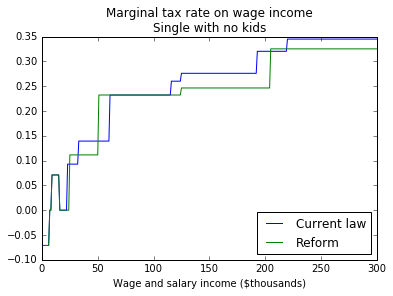

In [14]:
plt.plot(range(0, 301, 1), mtr_base, label='Current law')
plt.plot(range(0, 301, 1), mtr_reform, label='Reform')
#plt.title('Marginal tax rate on wage income' + '\n' + 'Married with two kids')
#plt.title('Marginal tax rate on wage income' + '\n' + 'Single with one kid')
plt.title('Marginal tax rate on wage income' + '\n' + 'Single with no kids')
plt.xlabel('Wage and salary income ($thousands)')
plt.legend(['Current law', 'Reform'], loc='lower right')

In [12]:
calc_cl.records.MARS[0] = 1
calc_all.records.MARS[0] = 1
calc_cl.records.n24[0] = 0
calc_all.records.n24[0] = 0